In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

In [1]:
import csv
import re
import string
import random

with open('C:/Users/Admin/Downloads/33l dataset/33l dataset/Syncs/Syncs/Sync1_#repost.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
tweets_exp=[]
tweets_abs=[]
if len(list_of_tweets)>500:
    indexes=random.sample(range(1,len(list_of_tweets)),500)
    for i in range(len(indexes)):
        tweets_exp.append(list_of_tweets[indexes[i]])
    for i in range(len(indexes)):
        tweets_abs.append(list_of_tweets[indexes[i]])
else:
    for i in range(len(list_of_tweets)):
        tweets_exp.append(list_of_tweets[i])
    for i in range(len(list_of_tweets)):
        tweets_abs.append(list_of_tweets[i])
    

In [2]:
print('found %d tweets' % len(list_of_tweets))

found 292 tweets


In [3]:
#getting expression words from pwords and nwords file

f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [4]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [5]:
tweets_exp

['craze',
 '',
 '',
 'free',
 '',
 'well',
 '',
 '',
 '',
 '',
 'grateful',
 '',
 '',
 '',
 'daring',
 '',
 '',
 '',
 'grateful',
 'ecstatic',
 '',
 '',
 'thankful fearless',
 'proud',
 '',
 '',
 '',
 '',
 'great',
 'classic',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'cheesy gossip',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'nag',
 '',
 '',
 '',
 '',
 'work promise',
 '',
 'loved triumph',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'happy',
 '',
 'freedom',
 'smile',
 'proud humble',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'modest',
 '',
 '',
 '',
 'magic love happiness',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'brilliant',
 '',
 '',
 '',
 '',
 '',
 'fresh colorful',
 '',
 '',
 'excuses improve',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'perfect',
 '',
 '',
 '',
 '',
 '',
 '',
 'crack',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'thank',
 'beautiful beautiful',
 'enjoy',
 '',
 '',
 '',
 'proud',
 '',
 '',
 '',
 'dark',
 'thank',
 '',
 '',
 'exquisi

In [6]:
#working on abstraction score(tweets_abs)........................................................................

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.         0.01742388 0.00253178 ... 0.00154103 0.00374866 0.04252558]
 [0.01742388 1.         0.00237732 ... 0.00144702 0.00351996 0.02390419]
 [0.00253178 0.00237732 1.         ... 0.00125194 0.00304544 0.0034734 ]
 ...
 [0.00154103 0.00144702 0.00125194 ... 1.         0.01393598 0.00211417]
 [0.00374866 0.00351996 0.00304544 ... 0.01393598 1.         0.00514287]
 [0.04252558 0.02390419 0.0034734  ... 0.00211417 0.00514287 1.        ]]


In [8]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 45
5 46
5 47
5 48
5 49
5 50
5 51
5 52
5 53
5 54
5 55
5 56
5 57
5 58
5 59
5 60
5 61
5 62
5 63
5 64
5 65
5 66
5 67
5 68
5 69
5 70
5 71
5 72
5 73
5 74
5 75
5 76
5 77
5 78
5 79
5 80
5 81
5 82
5 83
5 84
5 85
5 86
5 87
5 88
5 89
5 90
5 91
5 92
5 93
5 94
5 95
5 96
5 97
5 98
5 99
5 100
5 101
5 102
5 103
5 104
5 105
5 106
5 107
5 108
5 109
5 110
5 111
5 112
5 113
5 114
5 115
5 116
5 117
5 118
5 119
5 120
5 121
5 122
5 123
5 124
5 125
5 126
5 127
5 128
5 129
5 130
5 131
5 132
5 133
5 134
5 135
5 136
5 137
5 138
5 139
5 140
5 141
5 142
5 143
5 144
5 145
5 146
5 147
5 148
5 149
5 150
5 151
5 152
5 153
5 154
5 155
5 156
5 157
5 158
5 159
5 160
5 161
5 162
5 163
5 164
5 165
5 166
5 167
5 168
5 169
5 170
5 171
5 172
5 173
5 174
5 175
5 176
5 177
5 178
5 179
5 180
5 181
5 182
5 183
5 184
5 185
5 186
5 187
5 188
5 189
5 190
5 191
5 192
5 193
5 194
5 195
5 19

10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
10 80
10 81
10 82
10 83
10 84
10 85
10 86
10 87
10 88
10 89
10 90
10 91
10 92
10 93
10 94
10 95
10 96
10 97
10 98
10 99
10 100
10 101
10 102
10 103
10 104
10 105
10 106
10 107
10 108
10 109
10 110
10 111
10 112
10 113
10 114
10 115
10 116
10 117
10 118
10 119
10 120
10 121
10 122
10 123
10 124
10 125
10 126
10 127
10 128
10 129
10 130
10 131
10 132
10 133
10 134
10 135
10 136
10 137
10 138
10 139
10 140
10 141
10 142
10 143
10 144
10 145
10 146
10 147
10 148
10 149
10 150
10 151
10 152
10 153
10 154
10 155
10 156
10 157
10 158
10 159
10 160
10 161
10 162
10 163
10 164
10 165
10 166
10 167
10 168
10 169
10 170
10 171
10 172
10 173
10 174
10 175
10 176
10 177
10 178
10 179
10 180
10 181
10 182
10 183
10 184
10 185
10 186
10 187
10 188
10 189
10 190
10 191
10 192
10 193


14 160
14 161
14 162
14 163
14 164
14 165
14 166
14 167
14 168
14 169
14 170
14 171
14 172
14 173
14 174
14 175
14 176
14 177
14 178
14 179
14 180
14 181
14 182
14 183
14 184
14 185
14 186
14 187
14 188
14 189
14 190
14 191
14 192
14 193
14 194
14 195
14 196
14 197
14 198
14 199
14 200
14 201
14 202
14 203
14 204
14 205
14 206
14 207
14 208
14 209
14 210
14 211
14 212
14 213
14 214
14 215
14 216
14 217
14 218
14 219
14 220
14 221
14 222
14 223
14 224
14 225
14 226
14 227
14 228
14 229
14 230
14 231
14 232
14 233
14 234
14 235
14 236
14 237
14 238
14 239
14 240
14 241
14 242
14 243
14 244
14 245
14 246
14 247
14 248
14 249
14 250
14 251
14 252
14 253
14 254
14 255
14 256
14 257
14 258
14 259
14 260
14 261
14 262
14 263
14 264
14 265
14 266
14 267
14 268
14 269
14 270
14 271
14 272
14 273
14 274
14 275
14 276
14 277
14 278
14 279
14 280
14 281
14 282
14 283
14 284
14 285
14 286
14 287
14 288
14 289
14 290
14 291
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 2

18 283
18 284
18 285
18 286
18 287
18 288
18 289
18 290
18 291
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
19 39
19 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
19 54
19 55
19 56
19 57
19 58
19 59
19 60
19 61
19 62
19 63
19 64
19 65
19 66
19 67
19 68
19 69
19 70
19 71
19 72
19 73
19 74
19 75
19 76
19 77
19 78
19 79
19 80
19 81
19 82
19 83
19 84
19 85
19 86
19 87
19 88
19 89
19 90
19 91
19 92
19 93
19 94
19 95
19 96
19 97
19 98
19 99
19 100
19 101
19 102
19 103
19 104
19 105
19 106
19 107
19 108
19 109
19 110
19 111
19 112
19 113
19 114
19 115
19 116
19 117
19 118
19 119
19 120
19 121
19 122
19 123
19 124
19 125
19 126
19 127
19 128
19 129
19 130
19 131
19 132
19 133
19 134
19 135
19 136
19 137
19 138
19 139
19 140
19 141
19 142
19 143
19 144
19 145
19 146
19 147
19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19

23 163
23 164
23 165
23 166
23 167
23 168
23 169
23 170
23 171
23 172
23 173
23 174
23 175
23 176
23 177
23 178
23 179
23 180
23 181
23 182
23 183
23 184
23 185
23 186
23 187
23 188
23 189
23 190
23 191
23 192
23 193
23 194
23 195
23 196
23 197
23 198
23 199
23 200
23 201
23 202
23 203
23 204
23 205
23 206
23 207
23 208
23 209
23 210
23 211
23 212
23 213
23 214
23 215
23 216
23 217
23 218
23 219
23 220
23 221
23 222
23 223
23 224
23 225
23 226
23 227
23 228
23 229
23 230
23 231
23 232
23 233
23 234
23 235
23 236
23 237
23 238
23 239
23 240
23 241
23 242
23 243
23 244
23 245
23 246
23 247
23 248
23 249
23 250
23 251
23 252
23 253
23 254
23 255
23 256
23 257
23 258
23 259
23 260
23 261
23 262
23 263
23 264
23 265
23 266
23 267
23 268
23 269
23 270
23 271
23 272
23 273
23 274
23 275
23 276
23 277
23 278
23 279
23 280
23 281
23 282
23 283
23 284
23 285
23 286
23 287
23 288
23 289
23 290
23 291
24 25
24 26
24 27
24 28
24 29
24 30
24 31
24 32
24 33
24 34
24 35
24 36
24 37
24 38
24 39
24 40
2

28 54
28 55
28 56
28 57
28 58
28 59
28 60
28 61
28 62
28 63
28 64
28 65
28 66
28 67
28 68
28 69
28 70
28 71
28 72
28 73
28 74
28 75
28 76
28 77
28 78
28 79
28 80
28 81
28 82
28 83
28 84
28 85
28 86
28 87
28 88
28 89
28 90
28 91
28 92
28 93
28 94
28 95
28 96
28 97
28 98
28 99
28 100
28 101
28 102
28 103
28 104
28 105
28 106
28 107
28 108
28 109
28 110
28 111
28 112
28 113
28 114
28 115
28 116
28 117
28 118
28 119
28 120
28 121
28 122
28 123
28 124
28 125
28 126
28 127
28 128
28 129
28 130
28 131
28 132
28 133
28 134
28 135
28 136
28 137
28 138
28 139
28 140
28 141
28 142
28 143
28 144
28 145
28 146
28 147
28 148
28 149
28 150
28 151
28 152
28 153
28 154
28 155
28 156
28 157
28 158
28 159
28 160
28 161
28 162
28 163
28 164
28 165
28 166
28 167
28 168
28 169
28 170
28 171
28 172
28 173
28 174
28 175
28 176
28 177
28 178
28 179
28 180
28 181
28 182
28 183
28 184
28 185
28 186
28 187
28 188
28 189
28 190
28 191
28 192
28 193
28 194
28 195
28 196
28 197
28 198
28 199
28 200
28 201
28 202
28 

32 232
32 233
32 234
32 235
32 236
32 237
32 238
32 239
32 240
32 241
32 242
32 243
32 244
32 245
32 246
32 247
32 248
32 249
32 250
32 251
32 252
32 253
32 254
32 255
32 256
32 257
32 258
32 259
32 260
32 261
32 262
32 263
32 264
32 265
32 266
32 267
32 268
32 269
32 270
32 271
32 272
32 273
32 274
32 275
32 276
32 277
32 278
32 279
32 280
32 281
32 282
32 283
32 284
32 285
32 286
32 287
32 288
32 289
32 290
32 291
33 34
33 35
33 36
33 37
33 38
33 39
33 40
33 41
33 42
33 43
33 44
33 45
33 46
33 47
33 48
33 49
33 50
33 51
33 52
33 53
33 54
33 55
33 56
33 57
33 58
33 59
33 60
33 61
33 62
33 63
33 64
33 65
33 66
33 67
33 68
33 69
33 70
33 71
33 72
33 73
33 74
33 75
33 76
33 77
33 78
33 79
33 80
33 81
33 82
33 83
33 84
33 85
33 86
33 87
33 88
33 89
33 90
33 91
33 92
33 93
33 94
33 95
33 96
33 97
33 98
33 99
33 100
33 101
33 102
33 103
33 104
33 105
33 106
33 107
33 108
33 109
33 110
33 111
33 112
33 113
33 114
33 115
33 116
33 117
33 118
33 119
33 120
33 121
33 122
33 123
33 124
33 125
33

37 171
37 172
37 173
37 174
37 175
37 176
37 177
37 178
37 179
37 180
37 181
37 182
37 183
37 184
37 185
37 186
37 187
37 188
37 189
37 190
37 191
37 192
37 193
37 194
37 195
37 196
37 197
37 198
37 199
37 200
37 201
37 202
37 203
37 204
37 205
37 206
37 207
37 208
37 209
37 210
37 211
37 212
37 213
37 214
37 215
37 216
37 217
37 218
37 219
37 220
37 221
37 222
37 223
37 224
37 225
37 226
37 227
37 228
37 229
37 230
37 231
37 232
37 233
37 234
37 235
37 236
37 237
37 238
37 239
37 240
37 241
37 242
37 243
37 244
37 245
37 246
37 247
37 248
37 249
37 250
37 251
37 252
37 253
37 254
37 255
37 256
37 257
37 258
37 259
37 260
37 261
37 262
37 263
37 264
37 265
37 266
37 267
37 268
37 269
37 270
37 271
37 272
37 273
37 274
37 275
37 276
37 277
37 278
37 279
37 280
37 281
37 282
37 283
37 284
37 285
37 286
37 287
37 288
37 289
37 290
37 291
38 39
38 40
38 41
38 42
38 43
38 44
38 45
38 46
38 47
38 48
38 49
38 50
38 51
38 52
38 53
38 54
38 55
38 56
38 57
38 58
38 59
38 60
38 61
38 62
38 63
38 

42 130
42 131
42 132
42 133
42 134
42 135
42 136
42 137
42 138
42 139
42 140
42 141
42 142
42 143
42 144
42 145
42 146
42 147
42 148
42 149
42 150
42 151
42 152
42 153
42 154
42 155
42 156
42 157
42 158
42 159
42 160
42 161
42 162
42 163
42 164
42 165
42 166
42 167
42 168
42 169
42 170
42 171
42 172
42 173
42 174
42 175
42 176
42 177
42 178
42 179
42 180
42 181
42 182
42 183
42 184
42 185
42 186
42 187
42 188
42 189
42 190
42 191
42 192
42 193
42 194
42 195
42 196
42 197
42 198
42 199
42 200
42 201
42 202
42 203
42 204
42 205
42 206
42 207
42 208
42 209
42 210
42 211
42 212
42 213
42 214
42 215
42 216
42 217
42 218
42 219
42 220
42 221
42 222
42 223
42 224
42 225
42 226
42 227
42 228
42 229
42 230
42 231
42 232
42 233
42 234
42 235
42 236
42 237
42 238
42 239
42 240
42 241
42 242
42 243
42 244
42 245
42 246
42 247
42 248
42 249
42 250
42 251
42 252
42 253
42 254
42 255
42 256
42 257
42 258
42 259
42 260
42 261
42 262
42 263
42 264
42 265
42 266
42 267
42 268
42 269
42 270
42 271
42 272

47 114
47 115
47 116
47 117
47 118
47 119
47 120
47 121
47 122
47 123
47 124
47 125
47 126
47 127
47 128
47 129
47 130
47 131
47 132
47 133
47 134
47 135
47 136
47 137
47 138
47 139
47 140
47 141
47 142
47 143
47 144
47 145
47 146
47 147
47 148
47 149
47 150
47 151
47 152
47 153
47 154
47 155
47 156
47 157
47 158
47 159
47 160
47 161
47 162
47 163
47 164
47 165
47 166
47 167
47 168
47 169
47 170
47 171
47 172
47 173
47 174
47 175
47 176
47 177
47 178
47 179
47 180
47 181
47 182
47 183
47 184
47 185
47 186
47 187
47 188
47 189
47 190
47 191
47 192
47 193
47 194
47 195
47 196
47 197
47 198
47 199
47 200
47 201
47 202
47 203
47 204
47 205
47 206
47 207
47 208
47 209
47 210
47 211
47 212
47 213
47 214
47 215
47 216
47 217
47 218
47 219
47 220
47 221
47 222
47 223
47 224
47 225
47 226
47 227
47 228
47 229
47 230
47 231
47 232
47 233
47 234
47 235
47 236
47 237
47 238
47 239
47 240
47 241
47 242
47 243
47 244
47 245
47 246
47 247
47 248
47 249
47 250
47 251
47 252
47 253
47 254
47 255
47 256

52 116
52 117
52 118
52 119
52 120
52 121
52 122
52 123
52 124
52 125
52 126
52 127
52 128
52 129
52 130
52 131
52 132
52 133
52 134
52 135
52 136
52 137
52 138
52 139
52 140
52 141
52 142
52 143
52 144
52 145
52 146
52 147
52 148
52 149
52 150
52 151
52 152
52 153
52 154
52 155
52 156
52 157
52 158
52 159
52 160
52 161
52 162
52 163
52 164
52 165
52 166
52 167
52 168
52 169
52 170
52 171
52 172
52 173
52 174
52 175
52 176
52 177
52 178
52 179
52 180
52 181
52 182
52 183
52 184
52 185
52 186
52 187
52 188
52 189
52 190
52 191
52 192
52 193
52 194
52 195
52 196
52 197
52 198
52 199
52 200
52 201
52 202
52 203
52 204
52 205
52 206
52 207
52 208
52 209
52 210
52 211
52 212
52 213
52 214
52 215
52 216
52 217
52 218
52 219
52 220
52 221
52 222
52 223
52 224
52 225
52 226
52 227
52 228
52 229
52 230
52 231
52 232
52 233
52 234
52 235
52 236
52 237
52 238
52 239
52 240
52 241
52 242
52 243
52 244
52 245
52 246
52 247
52 248
52 249
52 250
52 251
52 252
52 253
52 254
52 255
52 256
52 257
52 258

57 138
57 139
57 140
57 141
57 142
57 143
57 144
57 145
57 146
57 147
57 148
57 149
57 150
57 151
57 152
57 153
57 154
57 155
57 156
57 157
57 158
57 159
57 160
57 161
57 162
57 163
57 164
57 165
57 166
57 167
57 168
57 169
57 170
57 171
57 172
57 173
57 174
57 175
57 176
57 177
57 178
57 179
57 180
57 181
57 182
57 183
57 184
57 185
57 186
57 187
57 188
57 189
57 190
57 191
57 192
57 193
57 194
57 195
57 196
57 197
57 198
57 199
57 200
57 201
57 202
57 203
57 204
57 205
57 206
57 207
57 208
57 209
57 210
57 211
57 212
57 213
57 214
57 215
57 216
57 217
57 218
57 219
57 220
57 221
57 222
57 223
57 224
57 225
57 226
57 227
57 228
57 229
57 230
57 231
57 232
57 233
57 234
57 235
57 236
57 237
57 238
57 239
57 240
57 241
57 242
57 243
57 244
57 245
57 246
57 247
57 248
57 249
57 250
57 251
57 252
57 253
57 254
57 255
57 256
57 257
57 258
57 259
57 260
57 261
57 262
57 263
57 264
57 265
57 266
57 267
57 268
57 269
57 270
57 271
57 272
57 273
57 274
57 275
57 276
57 277
57 278
57 279
57 280

62 182
62 183
62 184
62 185
62 186
62 187
62 188
62 189
62 190
62 191
62 192
62 193
62 194
62 195
62 196
62 197
62 198
62 199
62 200
62 201
62 202
62 203
62 204
62 205
62 206
62 207
62 208
62 209
62 210
62 211
62 212
62 213
62 214
62 215
62 216
62 217
62 218
62 219
62 220
62 221
62 222
62 223
62 224
62 225
62 226
62 227
62 228
62 229
62 230
62 231
62 232
62 233
62 234
62 235
62 236
62 237
62 238
62 239
62 240
62 241
62 242
62 243
62 244
62 245
62 246
62 247
62 248
62 249
62 250
62 251
62 252
62 253
62 254
62 255
62 256
62 257
62 258
62 259
62 260
62 261
62 262
62 263
62 264
62 265
62 266
62 267
62 268
62 269
62 270
62 271
62 272
62 273
62 274
62 275
62 276
62 277
62 278
62 279
62 280
62 281
62 282
62 283
62 284
62 285
62 286
62 287
62 288
62 289
62 290
62 291
63 64
63 65
63 66
63 67
63 68
63 69
63 70
63 71
63 72
63 73
63 74
63 75
63 76
63 77
63 78
63 79
63 80
63 81
63 82
63 83
63 84
63 85
63 86
63 87
63 88
63 89
63 90
63 91
63 92
63 93
63 94
63 95
63 96
63 97
63 98
63 99
63 100
63 101


82 102
82 103
82 104
82 105
82 106
82 107
82 108
82 109
82 110
82 111
82 112
82 113
82 114
82 115
82 116
82 117
82 118
82 119
82 120
82 121
82 122
82 123
82 124
82 125
82 126
82 127
82 128
82 129
82 130
82 131
82 132
82 133
82 134
82 135
82 136
82 137
82 138
82 139
82 140
82 141
82 142
82 143
82 144
82 145
82 146
82 147
82 148
82 149
82 150
82 151
82 152
82 153
82 154
82 155
82 156
82 157
82 158
82 159
82 160
82 161
82 162
82 163
82 164
82 165
82 166
82 167
82 168
82 169
82 170
82 171
82 172
82 173
82 174
82 175
82 176
82 177
82 178
82 179
82 180
82 181
82 182
82 183
82 184
82 185
82 186
82 187
82 188
82 189
82 190
82 191
82 192
82 193
82 194
82 195
82 196
82 197
82 198
82 199
82 200
82 201
82 202
82 203
82 204
82 205
82 206
82 207
82 208
82 209
82 210
82 211
82 212
82 213
82 214
82 215
82 216
82 217
82 218
82 219
82 220
82 221
82 222
82 223
82 224
82 225
82 226
82 227
82 228
82 229
82 230
82 231
82 232
82 233
82 234
82 235
82 236
82 237
82 238
82 239
82 240
82 241
82 242
82 243
82 244

87 253
87 254
87 255
87 256
87 257
87 258
87 259
87 260
87 261
87 262
87 263
87 264
87 265
87 266
87 267
87 268
87 269
87 270
87 271
87 272
87 273
87 274
87 275
87 276
87 277
87 278
87 279
87 280
87 281
87 282
87 283
87 284
87 285
87 286
87 287
87 288
87 289
87 290
87 291
88 89
88 90
88 91
88 92
88 93
88 94
88 95
88 96
88 97
88 98
88 99
88 100
88 101
88 102
88 103
88 104
88 105
88 106
88 107
88 108
88 109
88 110
88 111
88 112
88 113
88 114
88 115
88 116
88 117
88 118
88 119
88 120
88 121
88 122
88 123
88 124
88 125
88 126
88 127
88 128
88 129
88 130
88 131
88 132
88 133
88 134
88 135
88 136
88 137
88 138
88 139
88 140
88 141
88 142
88 143
88 144
88 145
88 146
88 147
88 148
88 149
88 150
88 151
88 152
88 153
88 154
88 155
88 156
88 157
88 158
88 159
88 160
88 161
88 162
88 163
88 164
88 165
88 166
88 167
88 168
88 169
88 170
88 171
88 172
88 173
88 174
88 175
88 176
88 177
88 178
88 179
88 180
88 181
88 182
88 183
88 184
88 185
88 186
88 187
88 188
88 189
88 190
88 191
88 192
88 193
88 

93 229
93 230
93 231
93 232
93 233
93 234
93 235
93 236
93 237
93 238
93 239
93 240
93 241
93 242
93 243
93 244
93 245
93 246
93 247
93 248
93 249
93 250
93 251
93 252
93 253
93 254
93 255
93 256
93 257
93 258
93 259
93 260
93 261
93 262
93 263
93 264
93 265
93 266
93 267
93 268
93 269
93 270
93 271
93 272
93 273
93 274
93 275
93 276
93 277
93 278
93 279
93 280
93 281
93 282
93 283
93 284
93 285
93 286
93 287
93 288
93 289
93 290
93 291
94 95
94 96
94 97
94 98
94 99
94 100
94 101
94 102
94 103
94 104
94 105
94 106
94 107
94 108
94 109
94 110
94 111
94 112
94 113
94 114
94 115
94 116
94 117
94 118
94 119
94 120
94 121
94 122
94 123
94 124
94 125
94 126
94 127
94 128
94 129
94 130
94 131
94 132
94 133
94 134
94 135
94 136
94 137
94 138
94 139
94 140
94 141
94 142
94 143
94 144
94 145
94 146
94 147
94 148
94 149
94 150
94 151
94 152
94 153
94 154
94 155
94 156
94 157
94 158
94 159
94 160
94 161
94 162
94 163
94 164
94 165
94 166
94 167
94 168
94 169
94 170
94 171
94 172
94 173
94 174
94 1

118 170
118 171
118 172
118 173
118 174
118 175
118 176
118 177
118 178
118 179
118 180
118 181
118 182
118 183
118 184
118 185
118 186
118 187
118 188
118 189
118 190
118 191
118 192
118 193
118 194
118 195
118 196
118 197
118 198
118 199
118 200
118 201
118 202
118 203
118 204
118 205
118 206
118 207
118 208
118 209
118 210
118 211
118 212
118 213
118 214
118 215
118 216
118 217
118 218
118 219
118 220
118 221
118 222
118 223
118 224
118 225
118 226
118 227
118 228
118 229
118 230
118 231
118 232
118 233
118 234
118 235
118 236
118 237
118 238
118 239
118 240
118 241
118 242
118 243
118 244
118 245
118 246
118 247
118 248
118 249
118 250
118 251
118 252
118 253
118 254
118 255
118 256
118 257
118 258
118 259
118 260
118 261
118 262
118 263
118 264
118 265
118 266
118 267
118 268
118 269
118 270
118 271
118 272
118 273
118 274
118 275
118 276
118 277
118 278
118 279
118 280
118 281
118 282
118 283
118 284
118 285
118 286
118 287
118 288
118 289
118 290
118 291
119 120
119 121
119 122


124 181
124 182
124 183
124 184
124 185
124 186
124 187
124 188
124 189
124 190
124 191
124 192
124 193
124 194
124 195
124 196
124 197
124 198
124 199
124 200
124 201
124 202
124 203
124 204
124 205
124 206
124 207
124 208
124 209
124 210
124 211
124 212
124 213
124 214
124 215
124 216
124 217
124 218
124 219
124 220
124 221
124 222
124 223
124 224
124 225
124 226
124 227
124 228
124 229
124 230
124 231
124 232
124 233
124 234
124 235
124 236
124 237
124 238
124 239
124 240
124 241
124 242
124 243
124 244
124 245
124 246
124 247
124 248
124 249
124 250
124 251
124 252
124 253
124 254
124 255
124 256
124 257
124 258
124 259
124 260
124 261
124 262
124 263
124 264
124 265
124 266
124 267
124 268
124 269
124 270
124 271
124 272
124 273
124 274
124 275
124 276
124 277
124 278
124 279
124 280
124 281
124 282
124 283
124 284
124 285
124 286
124 287
124 288
124 289
124 290
124 291
125 126
125 127
125 128
125 129
125 130
125 131
125 132
125 133
125 134
125 135
125 136
125 137
125 138
125 139


130 225
130 226
130 227
130 228
130 229
130 230
130 231
130 232
130 233
130 234
130 235
130 236
130 237
130 238
130 239
130 240
130 241
130 242
130 243
130 244
130 245
130 246
130 247
130 248
130 249
130 250
130 251
130 252
130 253
130 254
130 255
130 256
130 257
130 258
130 259
130 260
130 261
130 262
130 263
130 264
130 265
130 266
130 267
130 268
130 269
130 270
130 271
130 272
130 273
130 274
130 275
130 276
130 277
130 278
130 279
130 280
130 281
130 282
130 283
130 284
130 285
130 286
130 287
130 288
130 289
130 290
130 291
131 132
131 133
131 134
131 135
131 136
131 137
131 138
131 139
131 140
131 141
131 142
131 143
131 144
131 145
131 146
131 147
131 148
131 149
131 150
131 151
131 152
131 153
131 154
131 155
131 156
131 157
131 158
131 159
131 160
131 161
131 162
131 163
131 164
131 165
131 166
131 167
131 168
131 169
131 170
131 171
131 172
131 173
131 174
131 175
131 176
131 177
131 178
131 179
131 180
131 181
131 182
131 183
131 184
131 185
131 186
131 187
131 188
131 189


137 150
137 151
137 152
137 153
137 154
137 155
137 156
137 157
137 158
137 159
137 160
137 161
137 162
137 163
137 164
137 165
137 166
137 167
137 168
137 169
137 170
137 171
137 172
137 173
137 174
137 175
137 176
137 177
137 178
137 179
137 180
137 181
137 182
137 183
137 184
137 185
137 186
137 187
137 188
137 189
137 190
137 191
137 192
137 193
137 194
137 195
137 196
137 197
137 198
137 199
137 200
137 201
137 202
137 203
137 204
137 205
137 206
137 207
137 208
137 209
137 210
137 211
137 212
137 213
137 214
137 215
137 216
137 217
137 218
137 219
137 220
137 221
137 222
137 223
137 224
137 225
137 226
137 227
137 228
137 229
137 230
137 231
137 232
137 233
137 234
137 235
137 236
137 237
137 238
137 239
137 240
137 241
137 242
137 243
137 244
137 245
137 246
137 247
137 248
137 249
137 250
137 251
137 252
137 253
137 254
137 255
137 256
137 257
137 258
137 259
137 260
137 261
137 262
137 263
137 264
137 265
137 266
137 267
137 268
137 269
137 270
137 271
137 272
137 273
137 274


143 276
143 277
143 278
143 279
143 280
143 281
143 282
143 283
143 284
143 285
143 286
143 287
143 288
143 289
143 290
143 291
144 145
144 146
144 147
144 148
144 149
144 150
144 151
144 152
144 153
144 154
144 155
144 156
144 157
144 158
144 159
144 160
144 161
144 162
144 163
144 164
144 165
144 166
144 167
144 168
144 169
144 170
144 171
144 172
144 173
144 174
144 175
144 176
144 177
144 178
144 179
144 180
144 181
144 182
144 183
144 184
144 185
144 186
144 187
144 188
144 189
144 190
144 191
144 192
144 193
144 194
144 195
144 196
144 197
144 198
144 199
144 200
144 201
144 202
144 203
144 204
144 205
144 206
144 207
144 208
144 209
144 210
144 211
144 212
144 213
144 214
144 215
144 216
144 217
144 218
144 219
144 220
144 221
144 222
144 223
144 224
144 225
144 226
144 227
144 228
144 229
144 230
144 231
144 232
144 233
144 234
144 235
144 236
144 237
144 238
144 239
144 240
144 241
144 242
144 243
144 244
144 245
144 246
144 247
144 248
144 249
144 250
144 251
144 252
144 253


151 157
151 158
151 159
151 160
151 161
151 162
151 163
151 164
151 165
151 166
151 167
151 168
151 169
151 170
151 171
151 172
151 173
151 174
151 175
151 176
151 177
151 178
151 179
151 180
151 181
151 182
151 183
151 184
151 185
151 186
151 187
151 188
151 189
151 190
151 191
151 192
151 193
151 194
151 195
151 196
151 197
151 198
151 199
151 200
151 201
151 202
151 203
151 204
151 205
151 206
151 207
151 208
151 209
151 210
151 211
151 212
151 213
151 214
151 215
151 216
151 217
151 218
151 219
151 220
151 221
151 222
151 223
151 224
151 225
151 226
151 227
151 228
151 229
151 230
151 231
151 232
151 233
151 234
151 235
151 236
151 237
151 238
151 239
151 240
151 241
151 242
151 243
151 244
151 245
151 246
151 247
151 248
151 249
151 250
151 251
151 252
151 253
151 254
151 255
151 256
151 257
151 258
151 259
151 260
151 261
151 262
151 263
151 264
151 265
151 266
151 267
151 268
151 269
151 270
151 271
151 272
151 273
151 274
151 275
151 276
151 277
151 278
151 279
151 280
151 281


158 230
158 231
158 232
158 233
158 234
158 235
158 236
158 237
158 238
158 239
158 240
158 241
158 242
158 243
158 244
158 245
158 246
158 247
158 248
158 249
158 250
158 251
158 252
158 253
158 254
158 255
158 256
158 257
158 258
158 259
158 260
158 261
158 262
158 263
158 264
158 265
158 266
158 267
158 268
158 269
158 270
158 271
158 272
158 273
158 274
158 275
158 276
158 277
158 278
158 279
158 280
158 281
158 282
158 283
158 284
158 285
158 286
158 287
158 288
158 289
158 290
158 291
159 160
159 161
159 162
159 163
159 164
159 165
159 166
159 167
159 168
159 169
159 170
159 171
159 172
159 173
159 174
159 175
159 176
159 177
159 178
159 179
159 180
159 181
159 182
159 183
159 184
159 185
159 186
159 187
159 188
159 189
159 190
159 191
159 192
159 193
159 194
159 195
159 196
159 197
159 198
159 199
159 200
159 201
159 202
159 203
159 204
159 205
159 206
159 207
159 208
159 209
159 210
159 211
159 212
159 213
159 214
159 215
159 216
159 217
159 218
159 219
159 220
159 221
159 222


166 228
166 229
166 230
166 231
166 232
166 233
166 234
166 235
166 236
166 237
166 238
166 239
166 240
166 241
166 242
166 243
166 244
166 245
166 246
166 247
166 248
166 249
166 250
166 251
166 252
166 253
166 254
166 255
166 256
166 257
166 258
166 259
166 260
166 261
166 262
166 263
166 264
166 265
166 266
166 267
166 268
166 269
166 270
166 271
166 272
166 273
166 274
166 275
166 276
166 277
166 278
166 279
166 280
166 281
166 282
166 283
166 284
166 285
166 286
166 287
166 288
166 289
166 290
166 291
167 168
167 169
167 170
167 171
167 172
167 173
167 174
167 175
167 176
167 177
167 178
167 179
167 180
167 181
167 182
167 183
167 184
167 185
167 186
167 187
167 188
167 189
167 190
167 191
167 192
167 193
167 194
167 195
167 196
167 197
167 198
167 199
167 200
167 201
167 202
167 203
167 204
167 205
167 206
167 207
167 208
167 209
167 210
167 211
167 212
167 213
167 214
167 215
167 216
167 217
167 218
167 219
167 220
167 221
167 222
167 223
167 224
167 225
167 226
167 227
167 228


174 290
174 291
175 176
175 177
175 178
175 179
175 180
175 181
175 182
175 183
175 184
175 185
175 186
175 187
175 188
175 189
175 190
175 191
175 192
175 193
175 194
175 195
175 196
175 197
175 198
175 199
175 200
175 201
175 202
175 203
175 204
175 205
175 206
175 207
175 208
175 209
175 210
175 211
175 212
175 213
175 214
175 215
175 216
175 217
175 218
175 219
175 220
175 221
175 222
175 223
175 224
175 225
175 226
175 227
175 228
175 229
175 230
175 231
175 232
175 233
175 234
175 235
175 236
175 237
175 238
175 239
175 240
175 241
175 242
175 243
175 244
175 245
175 246
175 247
175 248
175 249
175 250
175 251
175 252
175 253
175 254
175 255
175 256
175 257
175 258
175 259
175 260
175 261
175 262
175 263
175 264
175 265
175 266
175 267
175 268
175 269
175 270
175 271
175 272
175 273
175 274
175 275
175 276
175 277
175 278
175 279
175 280
175 281
175 282
175 283
175 284
175 285
175 286
175 287
175 288
175 289
175 290
175 291
176 177
176 178
176 179
176 180
176 181
176 182
176 183


184 202
184 203
184 204
184 205
184 206
184 207
184 208
184 209
184 210
184 211
184 212
184 213
184 214
184 215
184 216
184 217
184 218
184 219
184 220
184 221
184 222
184 223
184 224
184 225
184 226
184 227
184 228
184 229
184 230
184 231
184 232
184 233
184 234
184 235
184 236
184 237
184 238
184 239
184 240
184 241
184 242
184 243
184 244
184 245
184 246
184 247
184 248
184 249
184 250
184 251
184 252
184 253
184 254
184 255
184 256
184 257
184 258
184 259
184 260
184 261
184 262
184 263
184 264
184 265
184 266
184 267
184 268
184 269
184 270
184 271
184 272
184 273
184 274
184 275
184 276
184 277
184 278
184 279
184 280
184 281
184 282
184 283
184 284
184 285
184 286
184 287
184 288
184 289
184 290
184 291
185 186
185 187
185 188
185 189
185 190
185 191
185 192
185 193
185 194
185 195
185 196
185 197
185 198
185 199
185 200
185 201
185 202
185 203
185 204
185 205
185 206
185 207
185 208
185 209
185 210
185 211
185 212
185 213
185 214
185 215
185 216
185 217
185 218
185 219
185 220


194 212
194 213
194 214
194 215
194 216
194 217
194 218
194 219
194 220
194 221
194 222
194 223
194 224
194 225
194 226
194 227
194 228
194 229
194 230
194 231
194 232
194 233
194 234
194 235
194 236
194 237
194 238
194 239
194 240
194 241
194 242
194 243
194 244
194 245
194 246
194 247
194 248
194 249
194 250
194 251
194 252
194 253
194 254
194 255
194 256
194 257
194 258
194 259
194 260
194 261
194 262
194 263
194 264
194 265
194 266
194 267
194 268
194 269
194 270
194 271
194 272
194 273
194 274
194 275
194 276
194 277
194 278
194 279
194 280
194 281
194 282
194 283
194 284
194 285
194 286
194 287
194 288
194 289
194 290
194 291
195 196
195 197
195 198
195 199
195 200
195 201
195 202
195 203
195 204
195 205
195 206
195 207
195 208
195 209
195 210
195 211
195 212
195 213
195 214
195 215
195 216
195 217
195 218
195 219
195 220
195 221
195 222
195 223
195 224
195 225
195 226
195 227
195 228
195 229
195 230
195 231
195 232
195 233
195 234
195 235
195 236
195 237
195 238
195 239
195 240


205 235
205 236
205 237
205 238
205 239
205 240
205 241
205 242
205 243
205 244
205 245
205 246
205 247
205 248
205 249
205 250
205 251
205 252
205 253
205 254
205 255
205 256
205 257
205 258
205 259
205 260
205 261
205 262
205 263
205 264
205 265
205 266
205 267
205 268
205 269
205 270
205 271
205 272
205 273
205 274
205 275
205 276
205 277
205 278
205 279
205 280
205 281
205 282
205 283
205 284
205 285
205 286
205 287
205 288
205 289
205 290
205 291
206 207
206 208
206 209
206 210
206 211
206 212
206 213
206 214
206 215
206 216
206 217
206 218
206 219
206 220
206 221
206 222
206 223
206 224
206 225
206 226
206 227
206 228
206 229
206 230
206 231
206 232
206 233
206 234
206 235
206 236
206 237
206 238
206 239
206 240
206 241
206 242
206 243
206 244
206 245
206 246
206 247
206 248
206 249
206 250
206 251
206 252
206 253
206 254
206 255
206 256
206 257
206 258
206 259
206 260
206 261
206 262
206 263
206 264
206 265
206 266
206 267
206 268
206 269
206 270
206 271
206 272
206 273
206 274


218 236
218 237
218 238
218 239
218 240
218 241
218 242
218 243
218 244
218 245
218 246
218 247
218 248
218 249
218 250
218 251
218 252
218 253
218 254
218 255
218 256
218 257
218 258
218 259
218 260
218 261
218 262
218 263
218 264
218 265
218 266
218 267
218 268
218 269
218 270
218 271
218 272
218 273
218 274
218 275
218 276
218 277
218 278
218 279
218 280
218 281
218 282
218 283
218 284
218 285
218 286
218 287
218 288
218 289
218 290
218 291
219 220
219 221
219 222
219 223
219 224
219 225
219 226
219 227
219 228
219 229
219 230
219 231
219 232
219 233
219 234
219 235
219 236
219 237
219 238
219 239
219 240
219 241
219 242
219 243
219 244
219 245
219 246
219 247
219 248
219 249
219 250
219 251
219 252
219 253
219 254
219 255
219 256
219 257
219 258
219 259
219 260
219 261
219 262
219 263
219 264
219 265
219 266
219 267
219 268
219 269
219 270
219 271
219 272
219 273
219 274
219 275
219 276
219 277
219 278
219 279
219 280
219 281
219 282
219 283
219 284
219 285
219 286
219 287
219 288


233 288
233 289
233 290
233 291
234 235
234 236
234 237
234 238
234 239
234 240
234 241
234 242
234 243
234 244
234 245
234 246
234 247
234 248
234 249
234 250
234 251
234 252
234 253
234 254
234 255
234 256
234 257
234 258
234 259
234 260
234 261
234 262
234 263
234 264
234 265
234 266
234 267
234 268
234 269
234 270
234 271
234 272
234 273
234 274
234 275
234 276
234 277
234 278
234 279
234 280
234 281
234 282
234 283
234 284
234 285
234 286
234 287
234 288
234 289
234 290
234 291
235 236
235 237
235 238
235 239
235 240
235 241
235 242
235 243
235 244
235 245
235 246
235 247
235 248
235 249
235 250
235 251
235 252
235 253
235 254
235 255
235 256
235 257
235 258
235 259
235 260
235 261
235 262
235 263
235 264
235 265
235 266
235 267
235 268
235 269
235 270
235 271
235 272
235 273
235 274
235 275
235 276
235 277
235 278
235 279
235 280
235 281
235 282
235 283
235 284
235 285
235 286
235 287
235 288
235 289
235 290
235 291
236 237
236 238
236 239
236 240
236 241
236 242
236 243
236 244


255 290
255 291
256 257
256 258
256 259
256 260
256 261
256 262
256 263
256 264
256 265
256 266
256 267
256 268
256 269
256 270
256 271
256 272
256 273
256 274
256 275
256 276
256 277
256 278
256 279
256 280
256 281
256 282
256 283
256 284
256 285
256 286
256 287
256 288
256 289
256 290
256 291
257 258
257 259
257 260
257 261
257 262
257 263
257 264
257 265
257 266
257 267
257 268
257 269
257 270
257 271
257 272
257 273
257 274
257 275
257 276
257 277
257 278
257 279
257 280
257 281
257 282
257 283
257 284
257 285
257 286
257 287
257 288
257 289
257 290
257 291
258 259
258 260
258 261
258 262
258 263
258 264
258 265
258 266
258 267
258 268
258 269
258 270
258 271
258 272
258 273
258 274
258 275
258 276
258 277
258 278
258 279
258 280
258 281
258 282
258 283
258 284
258 285
258 286
258 287
258 288
258 289
258 290
258 291
259 260
259 261
259 262
259 263
259 264
259 265
259 266
259 267
259 268
259 269
259 270
259 271
259 272
259 273
259 274
259 275
259 276
259 277
259 278
259 279
259 280


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

In [9]:
vabs = Gabs.number_of_nodes()
Gabs.number_of_edges()

42486

In [10]:
#working on expression score(tweets_exp).....................................................................

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


5 281
10 18
23 72
23 137
23 214
23 251
68 198
68 233
68 270
72 137
72 214
72 251
107 186
115 163
131 142
131 240
131 263
131 289
132 288
133 266
137 214
137 251
141 156
142 240
142 263
142 289
155 231
155 241
155 274
155 275
156 289
171 185
190 219
198 233
198 270
214 251
215 281
231 241
231 274
231 275
233 270
240 263
240 289
241 274
241 275
263 289
274 275


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


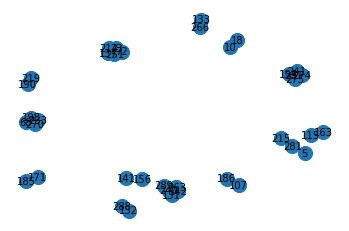

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
        #if  sc != 0:
#         Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [13]:
vexp = Gexp.number_of_nodes()
Gexp.number_of_edges()

47

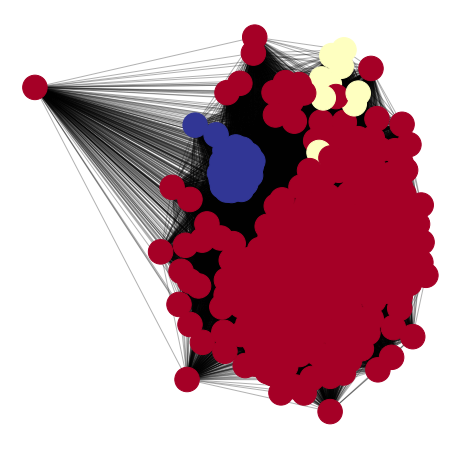

In [14]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

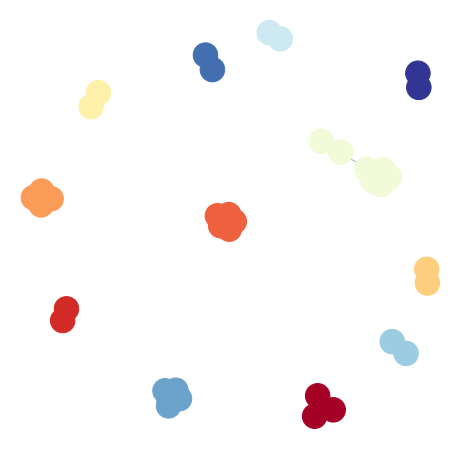

In [15]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [16]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({0: 245, 2: 38, 1: 9})
clusters in expression graph:  Counter({6: 7, 2: 5, 9: 5, 3: 4, 0: 3, 1: 2, 4: 2, 5: 2, 7: 2, 8: 2, 10: 2, 11: 2})


In [17]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [18]:
abs_score = float(v_abs/len(list_of_tweets))
abs_score

0.839041095890411

In [19]:
exp_score = float(v_exp/len(list_of_tweets))
exp_score

0.023972602739726026

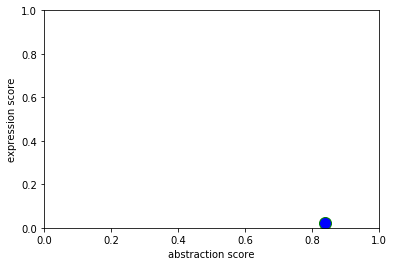

In [20]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()